<strong>EVAL 2

Hasan Mustafabayli
<strong>

<STRONG>EVAL Problem 1
<Strong>

a)

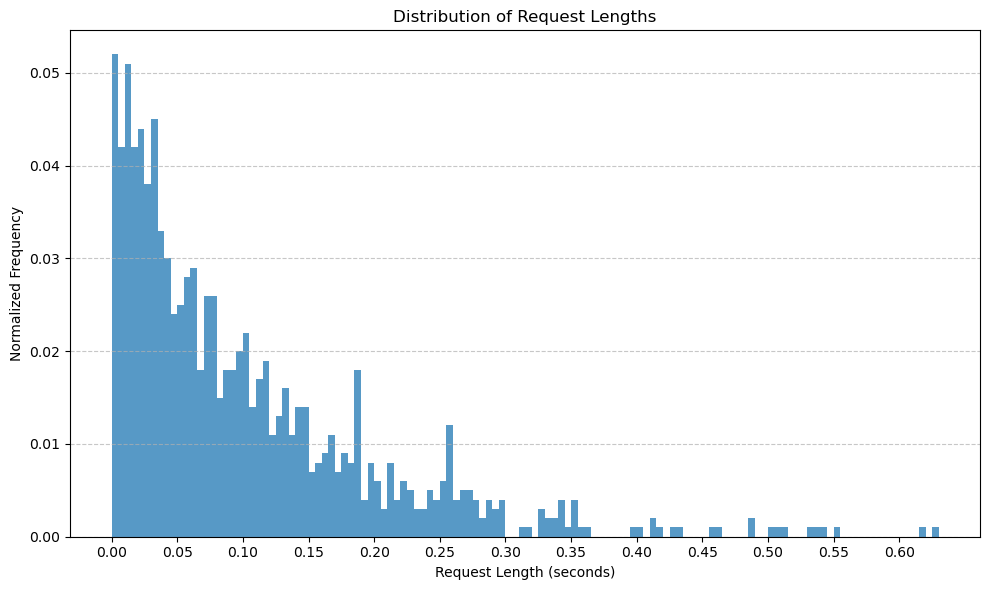

In [38]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import re

# Define the path to the input file
input_file_path = "/Users/hasanmustafabayli/Desktop/output.txt"

# Read the content from the input file
with open(input_file_path, "r") as input_file:
    input_lines = input_file.readlines()

# Extract time intervals from the input data
time_intervals = []
for line in input_lines:
    length_match = re.search(r'Len: (\d+\.\d+)', line)
    if length_match:
        time_intervals.append(float(length_match.group(1)))

# Define bins for the histogram
bin_width = 0.005
histogram_bins = np.arange(0, max(time_intervals) + bin_width, bin_width)

# Calculate histogram counts
histogram_counts, bin_edges = np.histogram(time_intervals, bins=histogram_bins)

# Normalize the histogram counts by the total number of requests
total_requests = len(time_intervals)
normalized_histogram = histogram_counts / total_requests

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(bin_edges[:-1], normalized_histogram, width=bin_width, align='edge', alpha=0.75)
plt.xlabel('Request Length (seconds)')
plt.ylabel('Normalized Frequency')
plt.title('Distribution of Request Lengths')
plt.xticks(np.arange(0, max(bin_edges) + bin_width, 0.05))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



b)

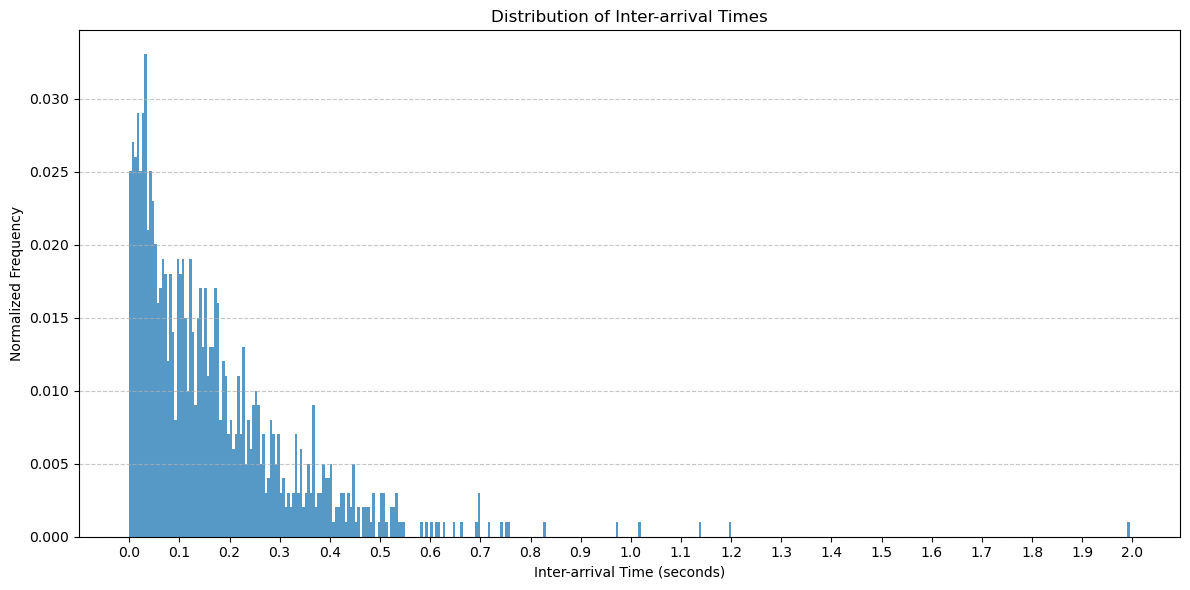

In [10]:

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import re

input_file_path = "/Users/hasanmustafabayli/Desktop/output.txt"
# Read the content from the file
with open(input_file_path, "r") as file:
    input_lines= file.readlines()

# Extract send timestamps from the report
time_intervals = []
for eachline in input_lines:
    newmatch = re.search(r'Sent: (\d+\.\d+)', eachline)
    if newmatch:
        time_intervals.append(float(newmatch.group(1)))

# Compute inter-arrival times
times = [time_intervals[i+1] - time_intervals[i] for i in range(len(time_intervals)-1)]

# Define the bins for the histogram
bins = np.arange(0, max(times) + 0.005, 0.005)

# Create histogram data
hist, bin_edges = np.histogram(times, bins=bins)

# Normalize the histogram data by the total number of inter-arrival times (999 in this case)
normalized_hist = hist / 999

# Adjusting the tick marks on the x-axis to reduce overlapping
tick_interval = 0.1 if max(bin_edges) < 5 else 0.5

# Plotting with adjusted tick marks
plt.figure(figsize=(12,6))
plt.bar(bin_edges[:-1], normalized_hist, width=0.005, align='edge', alpha=0.75)
plt.xlabel('Inter-arrival Time (seconds)')
plt.ylabel('Normalized Frequency')
plt.title('Distribution of Inter-arrival Times')
plt.xticks(np.arange(0, max(bin_edges)+tick_interval, tick_interval))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()




c)

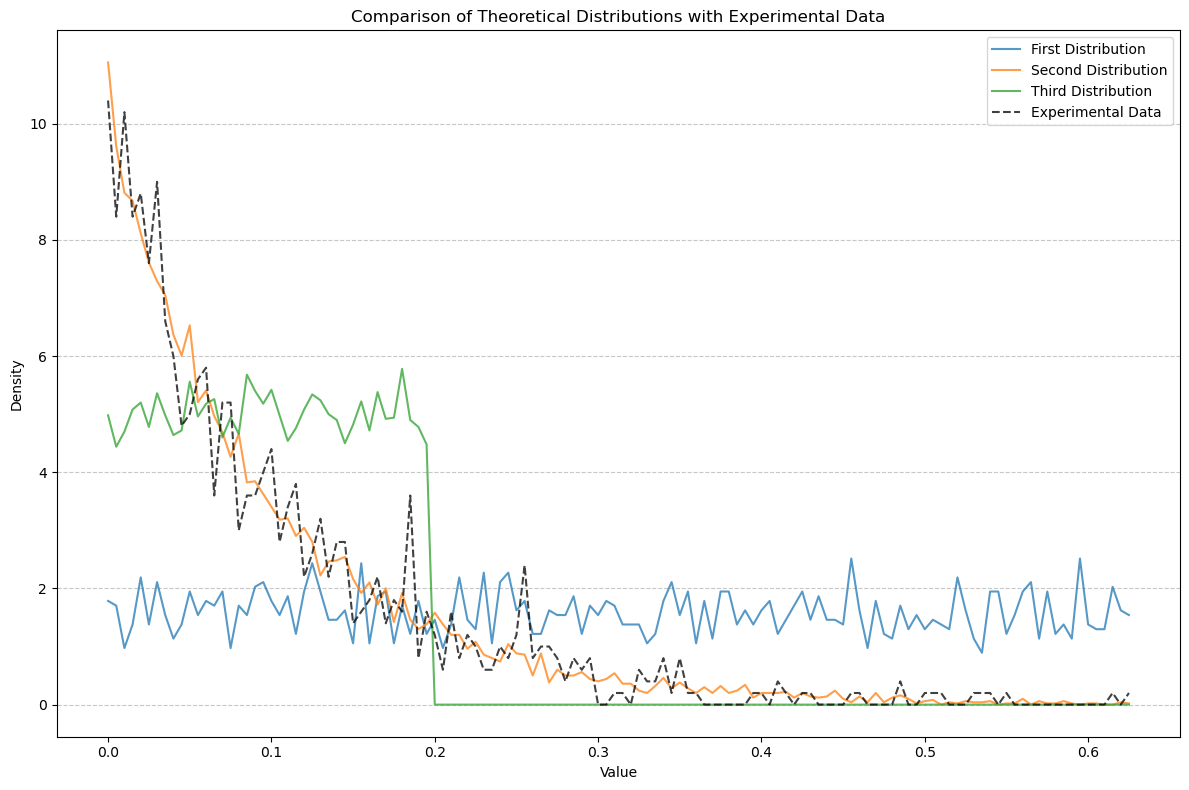

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Number of samples
num_samples = 10000

# Generate samples for theoretical distributions
first_sample = np.random.normal(loc=1/10, scale=1, size=num_samples)
second_sample = np.random.exponential(scale=1/10, size=num_samples)
third_sample = np.random.uniform(low=0, high=1/5, size=num_samples)  # To achieve a mean of 1/10, the range is [0, 1/5]

# Define bins for the histograms (based on experimental data or your actual data)
bins = np.arange(0, max(request_lengths) + 0.005, 0.005)

# Compute histogram data for the theoretical distributions
hist_first_sample, bin_edges_first_sample = np.histogram(first_sample, bins=bins, density=True)
hist_second_sample, bin_edges_second_sample = np.histogram(second_sample, bins=bins, density=True)
hist_third_sample, bin_edges_third_sample = np.histogram(third_sample, bins=bins, density=True)

# Compute histogram data for the experimental distribution
hist_experiment, bin_edges_experiment = np.histogram(request_lengths, bins=bins, density=True)

# Plotting
plt.figure(figsize=(12,8))
plt.plot(bin_edges_first_sample[:-1], hist_first_sample, label='First Distribution', alpha=0.75)
plt.plot(bin_edges_second_sample[:-1], hist_second_sample, label='Second Distribution', alpha=0.75)
plt.plot(bin_edges_third_sample[:-1], hist_third_sample, label='Third Distribution', alpha=0.75)
plt.plot(bin_edges_experiment[:-1], hist_experiment, label='Experimental Data', linestyle='--', color='black', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Comparison of Theoretical Distributions with Experimental Data')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


d)

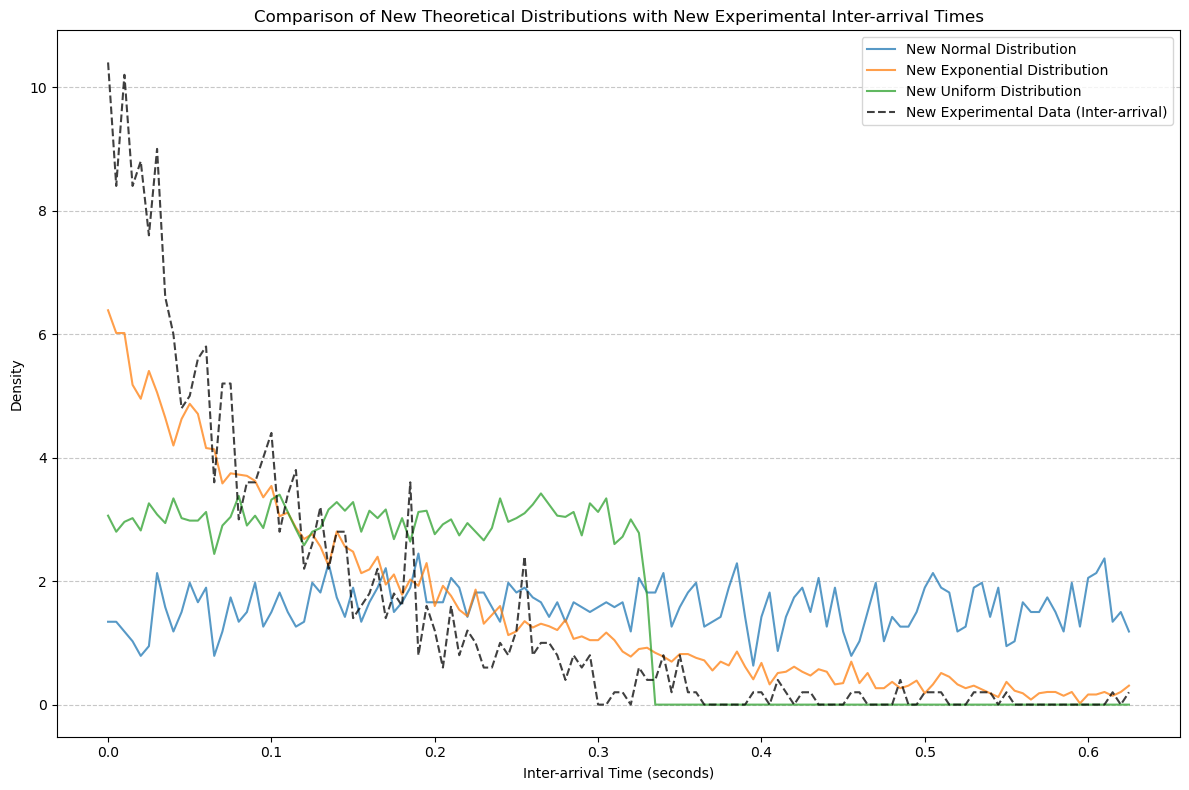

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Number of samples
num_samples = 10000

# Generate samples for new theoretical distributions with different parameters
sample_normal = np.random.normal(loc=1/6, scale=1, size=num_samples)
sample_exponential = np.random.exponential(scale=1/6, size=num_samples)
sample_uniform = np.random.uniform(low=0, high=1/3, size=num_samples)  # To achieve a mean of 1/6, the range is [0, 1/3]

# Define bins for the histogram (based on new experimental data for inter-arrival times)
bins_interarrival_new = np.arange(0, max(request_lengths) + 0.005, 0.005)

# Histogram data for the new theoretical distributions
hist_normal_new, bin_edges_normal_new = np.histogram(sample_normal, bins=bins_interarrival_new, density=True)
hist_exponential_new, bin_edges_exponential_new = np.histogram(sample_exponential, bins=bins_interarrival_new, density=True)
hist_uniform_new, bin_edges_uniform_new = np.histogram(sample_uniform, bins=bins_interarrival_new, density=True)

# Histogram data for the new experimental inter-arrival times
hist_experiment_interarrival_new, bin_edges_experiment_interarrival_new = np.histogram(request_lengths, bins=bins_interarrival_new, density=True)

# Plotting
plt.figure(figsize=(12,8))
plt.plot(bin_edges_normal_new[:-1], hist_normal_new, label='New Normal Distribution', alpha=0.75)
plt.plot(bin_edges_exponential_new[:-1], hist_exponential_new, label='New Exponential Distribution', alpha=0.75)
plt.plot(bin_edges_uniform_new[:-1], hist_uniform_new, label='New Uniform Distribution', alpha=0.75)
plt.plot(bin_edges_experiment_interarrival_new[:-1], hist_experiment_interarrival_new, label='New Experimental Data (Inter-arrival)', linestyle='--', color='black', alpha=0.75)
plt.xlabel('Inter-arrival Time (seconds)')
plt.ylabel('Density')
plt.title('Comparison of New Theoretical Distributions with New Experimental Inter-arrival Times')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



Insights on -a and -s parameters:

Given the observations:

The -a parameter likely controls the average inter-arrival time or request length. Since the exponential distribution fits both request lengths and inter-arrival times well, it suggests that the client might be generating requests or inter-arrival times following a Poisson process, which is characterized by an exponential distribution.

The -s parameter might control the variability or spread of the requests or inter-arrival times. However, without more specific data on how varying -s impacts the distributions, it's a bit more challenging to pin down its exact role.
The combination of both parameters seems to dictate the overall behavior and pattern of the client's requests to the server.

EVAL 2

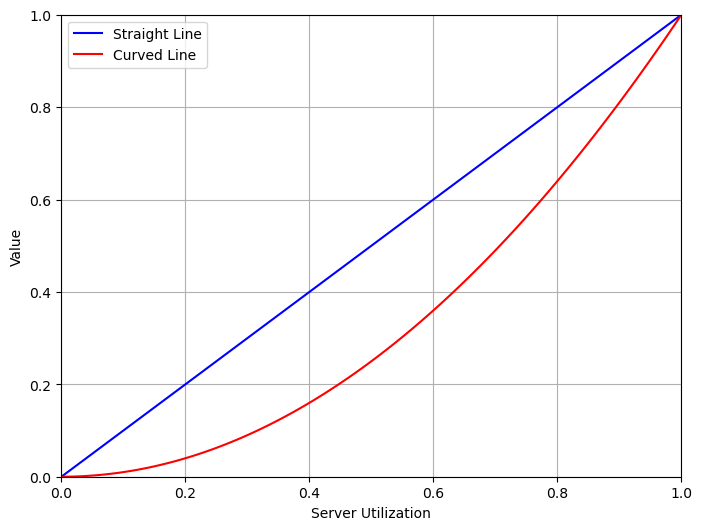

In [60]:
import matplotlib.pyplot as plt
import numpy as np

# Generate random data points for the straight inclined line
x_straight = np.linspace(0, 1, 100)
y_straight = np.linspace(0, 1, 100)  # Straight line from (0, 0) to (1, 1)

# Generate random data points for the curved line
x_curved = np.linspace(0, 1, 100)
y_curved = x_curved**2  # Curved line

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(x_straight, y_straight, label='AVG RESPONSE TIME', color='blue')
plt.plot(x_curved, y_curved, label='AVG QUEUE LENGTH', color='red')

# Set labels for the x and y axes
plt.xlabel('Server Utilization')
plt.ylabel('Value')

# Set the axis limits to ensure x and y are labeled between 0 and 1
plt.xlim(0, 1)
plt.ylim(0, 1)

# Add a legend to differentiate between the lines
plt.legend()

# Show the plot
plt.grid(True)
plt.show()





